In [139]:
import numpy as np
import xarray as xr
import sys
sys.path.insert(0,"/home/mtissot/SpinUp/jumper/lib")
import matplotlib.pyplot as plt

# **LOAD RESTART FILES**

In [127]:
dataset1    = xr.open_dataset('/data/mtissot/infos4restart/data_restart/OCE_CM65v420-LR-CdL-pi-01_19141231_restart.nc',decode_times=False) 
mask  = xr.open_dataset('/data/mtissot/infos4restart/eORCA1.4.2_mesh_mask_modJD.nc',decode_times=False) 
dataset2    = xr.open_dataset('/data/mtissot/infos4restart/data_restart/NEW_OCE_CM65v420-LR-CdL-pi-01_19141231_restart.nc',decode_times=False) 

In [128]:
print("restart features : \n", list(dataset2.keys()))
print("\nmask features : \n", list(mask.keys()))

restart features : 
 ['adatrj', 'avm_k', 'avt_k', 'dissl', 'e3t_ini', 'e3t_m', 'emp_b', 'en', 'fraqsr_1lev', 'frc_s', 'frc_t', 'frc_v', 'frq_m', 'fwfisf_par_b', 'hc_loc_ini', 'isf_hc_par_b', 'isf_sc_par_b', 'kt', 'ndastp', 'nn_fsbc', 'ntime', 'qns_b', 'qsr_hc_b', 'rdt', 'rhop', 'rnf_b', 'rnf_hc_b', 'rnf_sc_b', 'sb', 'sbc_hc_b', 'sbc_sc_b', 'sc_loc_ini', 'sfx_b', 'sn', 'ssh_ini', 'ssh_m', 'sshb', 'sshn', 'sss_m', 'sst_m', 'ssu_m', 'ssv_m', 'surf_ini', 'tb', 'tmask_ini', 'tn', 'ub', 'ub2_b', 'un', 'un_bf', 'utau_b', 'vb', 'vb2_b', 'vn', 'vn_bf', 'vtau_b', 'xx', 'yy']

mask features : 
 ['e1f', 'e1t', 'e1u', 'e1v', 'e2f', 'e2t', 'e2u', 'e2v', 'e3f_0', 'e3t_0', 'e3t_1d', 'e3u_0', 'e3uw_0', 'e3v_0', 'e3vw_0', 'e3w_0', 'e3w_1d', 'ff_f', 'ff_t', 'fmask', 'gdept_0', 'gdept_1d', 'gdepw_0', 'gdepw_1d', 'glamf', 'glamt', 'glamu', 'glamv', 'gphif', 'gphit', 'gphiu', 'gphiv', 'mbathy', 'misf', 'nav_lev', 'time_counter', 'tmask', 'tmaskutil', 'umask', 'umaskutil', 'vmask', 'vmaskutil', 'gridx', 'gri

# **ANALYSE TRUTH VS PREDICTIONS**

rhop,u,v,e3t,ssh,T,S,

### IN SITU DENSITY (rhop)

In [206]:
new = dataset2.rhop.where(mask.tmask.values)
old = dataset1.rhop.where(mask.tmask.values)

diff_new = np.diff(new.isel(time_counter=0), axis=0) 
diff_old = np.diff(old.isel(time_counter=0), axis=0) 

val  = [old[0],new[0]]
diff = [diff_old,diff_new]

/tmp/ipykernel_1826838/2392123758.py:4: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(val[0],axis=(1,2)),dataset1.nav_lev,linestyle="dashed",color="black",alpha=0.7,linewidth=3,label="truth")
/tmp/ipykernel_1826838/2392123758.py:5: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(val[1],axis=(1,2)),dataset2.nav_lev,color="purple",alpha=0.8,linewidth=2,label="predictions")


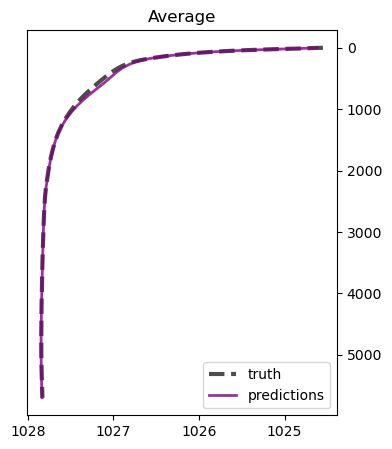

In [156]:
fig = plt.figure(figsize=(4, 5))
ax = plt.gca()

ax.plot(np.nanmean(val[0],axis=()1,2),dataset1.nav_lev,linestyle="dashed",color="black",alpha=0.7,linewidth=3,label="truth")
ax.plot(np.nanmean(val[1],axis=(1,2)),dataset2.nav_lev,color="purple",alpha=0.8,linewidth=2,label="predictions")
ax.invert_yaxis()
ax.invert_xaxis()

#ax.set_xlim(left=1)

ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax.legend()
ax.set_title('Average
')
plt.show()

/tmp/ipykernel_1826838/3771032732.py:8: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(diff[0], axis=(1, 2)), dataset1.nav_lev[:-1], linestyle="dashed", color="black", alpha=0.7, linewidth=3, label="truth")
/tmp/ipykernel_1826838/3771032732.py:9: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(diff[1], axis=(1, 2)), dataset2.nav_lev[:-1], color="purple", alpha=0.8, linewidth=2, label="predictions")


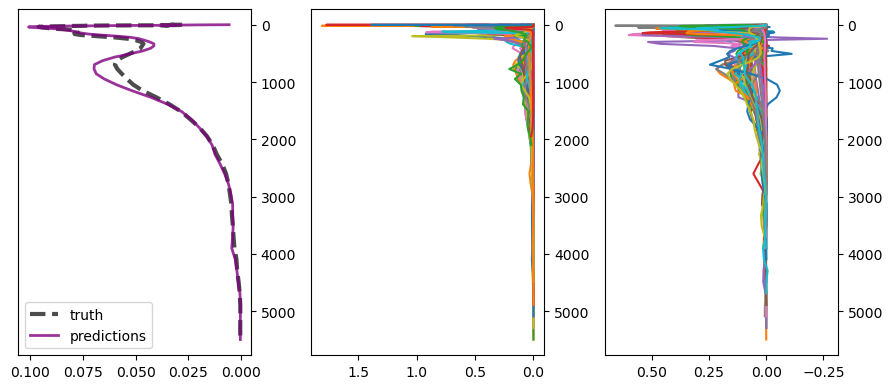

In [208]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(9, 4))


ax = axes[0]
ax.plot(np.nanmean(diff[0], axis=(1, 2)), dataset1.nav_lev[:-1], linestyle="dashed", color="black", alpha=0.7, linewidth=3, label="truth")
ax.plot(np.nanmean(diff[1], axis=(1, 2)), dataset2.nav_lev[:-1], color="purple", alpha=0.8, linewidth=2, label="predictions")
ax.invert_yaxis()
ax.invert_xaxis()
ax.yaxis.tick_right()
ax.legend()


ax = axes[1]
for i in range(0, 360, 40):
    for j in range(0, 331, 28):
        if not np.isnan(diff[0][:30, j, i]).any():
            l = len(diff[0][:, j, i])
            ax.plot(diff[0][:, j, i], dataset2.nav_lev[:l])
ax.invert_yaxis()
ax.invert_xaxis()
ax.yaxis.tick_right()


ax = axes[2]
for i in range(0, 360, 30):
    for j in range(0, 331, 28):
        if not np.isnan(diff[1][:30, j, i]).any():
            l = len(diff[1][:, j, i])
            ax.plot(diff[1][:, j, i], dataset1.nav_lev[:l])
ax.invert_yaxis()
ax.invert_xaxis()
ax.yaxis.tick_right()

plt.tight_layout()
plt.show()


### U VELOCITIES

In [130]:
new = dataset2.un.where(mask.umask.values)
old = dataset1.un.where(mask.umask.values)

diff_new = np.diff(new.isel(time_counter=0), axis=0) 
diff_old = np.diff(old.isel(time_counter=0), axis=0) 

val  = [old[0],new[0]]
diff = [diff_old,diff_new]

/tmp/ipykernel_1826838/909273091.py:4: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(val[0],axis=(1,2)),dataset1.nav_lev,linestyle="dashed",color="black",alpha=0.7,linewidth=3,label="truth")
/tmp/ipykernel_1826838/909273091.py:5: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(val[1],axis=(1,2)),dataset2.nav_lev,color="purple",alpha=0.8,linewidth=2,label="predictions")


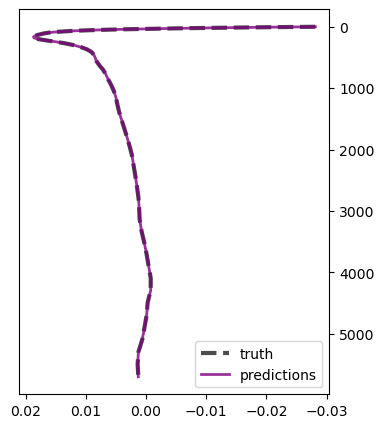

In [131]:
fig = plt.figure(figsize=(4, 5))
ax = plt.gca()

ax.plot(np.nanmean(val[0],axis=(1,2)),dataset1.nav_lev,linestyle="dashed",color="black",alpha=0.7,linewidth=3,label="truth")
ax.plot(np.nanmean(val[1],axis=(1,2)),dataset2.nav_lev,color="purple",alpha=0.8,linewidth=2,label="predictions")
ax.invert_yaxis()
ax.invert_xaxis()

#ax.set_xlim(left=1)

ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax.legend()
plt.show()

/tmp/ipykernel_1826838/647516894.py:5: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(diff[0],axis=(1,2)),dataset1.nav_lev[:-1],linestyle="dashed",color="black",alpha=0.7,linewidth=3,label="truth")
/tmp/ipykernel_1826838/647516894.py:6: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(diff[1],axis=(1,2)),dataset2.nav_lev[:-1],color="purple",alpha=0.8,linewidth=2,label="predictions")


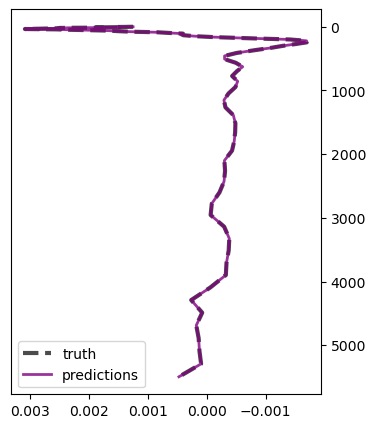

In [132]:
fig = plt.figure(figsize=(4, 5))
ax = plt.gca()

#l = len(rhop_new[:,j,i])
ax.plot(np.nanmean(diff[0],axis=(1,2)),dataset1.nav_lev[:-1],linestyle="dashed",color="black",alpha=0.7,linewidth=3,label="truth")
ax.plot(np.nanmean(diff[1],axis=(1,2)),dataset2.nav_lev[:-1],color="purple",alpha=0.8,linewidth=2,label="predictions")
ax.invert_yaxis()
ax.invert_xaxis()

#ax.set_xlim(left=1)

ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax.legend()
plt.show()

### V VELOCITIES

In [133]:
new = dataset2.vn.where(mask.vmask.values)
old = dataset1.vn.where(mask.vmask.values)

diff_new = np.diff(new.isel(time_counter=0), axis=0) 
diff_old = np.diff(old.isel(time_counter=0), axis=0) 

val  = [old[0],new[0]]
diff = [diff_old,diff_new]

/tmp/ipykernel_1826838/909273091.py:4: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(val[0],axis=(1,2)),dataset1.nav_lev,linestyle="dashed",color="black",alpha=0.7,linewidth=3,label="truth")
/tmp/ipykernel_1826838/909273091.py:5: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(val[1],axis=(1,2)),dataset2.nav_lev,color="purple",alpha=0.8,linewidth=2,label="predictions")


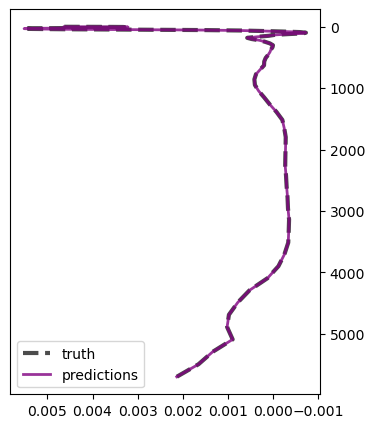

In [134]:
fig = plt.figure(figsize=(4, 5))
ax = plt.gca()

ax.plot(np.nanmean(val[0],axis=(1,2)),dataset1.nav_lev,linestyle="dashed",color="black",alpha=0.7,linewidth=3,label="truth")
ax.plot(np.nanmean(val[1],axis=(1,2)),dataset2.nav_lev,color="purple",alpha=0.8,linewidth=2,label="predictions")
ax.invert_yaxis()
ax.invert_xaxis()

#ax.set_xlim(left=1)

ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax.legend()
plt.show()

/tmp/ipykernel_1826838/647516894.py:5: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(diff[0],axis=(1,2)),dataset1.nav_lev[:-1],linestyle="dashed",color="black",alpha=0.7,linewidth=3,label="truth")
/tmp/ipykernel_1826838/647516894.py:6: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(diff[1],axis=(1,2)),dataset2.nav_lev[:-1],color="purple",alpha=0.8,linewidth=2,label="predictions")


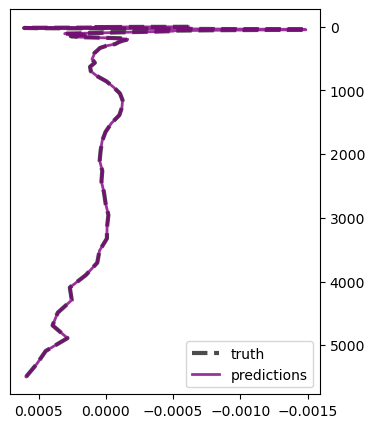

In [135]:
fig = plt.figure(figsize=(4, 5))
ax = plt.gca()

#l = len(rhop_new[:,j,i])
ax.plot(np.nanmean(diff[0],axis=(1,2)),dataset1.nav_lev[:-1],linestyle="dashed",color="black",alpha=0.7,linewidth=3,label="truth")
ax.plot(np.nanmean(diff[1],axis=(1,2)),dataset2.nav_lev[:-1],color="purple",alpha=0.8,linewidth=2,label="predictions")
ax.invert_yaxis()
ax.invert_xaxis()

#ax.set_xlim(left=1)

ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax.legend()
plt.show()

----